<a href="https://colab.research.google.com/github/hurshd0/Clueless/blob/master/LS_DS_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [0]:
#!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

In [0]:
#!unzip LoanStats_2018Q4.csv.zip

In [0]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [0]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","4543.48","4543.48","1511.13","1511.13","1056.52","454.61","0.0","0.0","0.0","Jun-2019","190.21","Jul-2019","Jun-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.9

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [0]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv('LoanStats_2018Q4.csv')
df.head(20)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,123,124,125,126,127,128,129,130,131,132,133,134,135,136,138,139,140,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title                 emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       5000      5000        5000             36 months  17.97%  180.69      D     D1        Administrative            6 years    MORTGAGE       59280      Source Verified     Dec-2018 Current     n          NaN NaN  debt_consolidation Debt consolidation      490xx    MI         10.51 0           Apr-2011         0              NaN                    NaN                    8        0       4599      19.1%      13        w                   4456.17   4456.17       895.96           895.96          543.83          352.13        0.0                0.0        0.0                     Jun-2019     180.69          Jul-2019     Jun-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            110299      0           1           0           2           14                 7150         72      0           2           0          35       24100            1      5           0            4                    18383       13800          0       0                        0           87                 92                   15                    14             2        77                   NaN                      14                    NaN                            0                     0              3               3           3         4         6             7             3                   8        0                0            0                  0                  100         

In [0]:
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,123,124,125,128,129,130,133,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment grade sub_grade             emp_title emp_length home_ownership  annual_inc verification_status   issue_d loan_status pymnt_plan  url  desc             purpose                    title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  annual_inc_joint  dti_joint verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  \
0  NaN        NaN     5000.0       5000.0           5000.0   36 months   17.97%       180.69     D        D1        Administrative    6 years       MORTGAGE     59280.0     Source Verified  Dec-2018     Current          n  NaN   NaN  debt_consolidation       Debt consolidation    490xx         MI  10.51          0.0         Apr-2011             0.0                     NaN                     NaN       8.0      0.0     4599.0      19.1%       13.0                   w    4456.17        4456.17       895.96           895.96           543.83         352.13                 0.0         0.0                      0.0     Jun-2019           180.69     Jul-2019           Jun-2019                         0.0                          NaN          1.0       Individual               NaN        NaN                       NaN             0.0           0.0     110299.0          0.0          1.0          0.0          2.0                14.0        7150.0     72.0          0.0          2.0         0.0   
1  NaN        NaN    25000.0      25000.0          25000.0   60 months   14.47%       587.82     C        C2               teacher  10+ years            OWN    110000.0        Not Verified  Dec-2018     Current          n  NaN   NaN         credit_card  Credit card refinancing    117xx         NY  26.43          1.0         Jan-1997             0.0                     7.0                     NaN      23.0      0.0    39053.0      45.7%       49.0                   w   23533.24       23533.24      2908.95          2908.95          1466.76        1442.19                 0.0         0.0                      0.0     May-2019           587.82     Jul-2019           Jun-2019                         0.0                          7.0          1.0       Individual               NaN        NaN                       NaN             0.0           0.0      95648.0          0.0          3.0          0.0          0.0                35.0       54716.0     23.0          1.0          2.0      8422.0   
2  NaN        NaN    10000.0      10000.0          10000.0   36 months   10.33%       324.23     B        B1                   NaN   < 1 year       MORTGAGE    280000.0        Not Verified  Dec-2018     Current          n  NaN   NaN  debt_consolidation       Debt consolidation    974xx         OR   6.15          2.0         Jan-1996             0.0                    18.0                     NaN      14.0      0.0     9082.0        38%       23.0                   w    8788.59        8788.59      1612.54          1612.54          1211.41         401.13                 0.0         0.0                      0.0     May-2019           324.23     Jul-2019           Jun-2019                         0.0                          NaN          1.0       Individual               NaN        NaN                       NaN             0.0         671.0     246828.0          1.0          3.0          2.0          3.0                 1.0       48552.0     62.0          1.0          3.0      4923.0   
3  NaN  

In [0]:
df.shape

(128414, 144)

In [0]:
df.isnull().sum()

id                                            128412
member_id                                     128414
loan_amnt                                          2
funded_amnt                                        2
funded_amnt_inv                                    2
term                                               2
int_rate                                           2
installment                                        2
grade                                              2
sub_grade                                          2
emp_title                                      20949
emp_length                                     11706
home_ownership                                     2
annual_inc                                         2
verification_status                                2
issue_d                                            2
loan_status                                        2
pymnt_plan                                         2
url                                           

In [0]:
df.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment grade sub_grade             emp_title emp_length home_ownership  annual_inc verification_status   issue_d loan_status pymnt_plan  url  desc             purpose                    title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  annual_inc_joint  dti_joint verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  \
128409                                               NaN        NaN     5000.0       5000.0           5000.0   36 months   13.56%       169.83     C        C1          Payoff Clerk  10+ years       MORTGAGE     35360.0        Not Verified  Oct-2018     Current          n  NaN   NaN  debt_consolidation       Debt consolidation    381xx         TN  11.30          1.0         Jun-2006             0.0                    21.0                     NaN       9.0      0.0     2597.0      27.3%       15.0                   f    4056.68        4056.68      1354.87          1354.87           943.32         411.55                 0.0         0.0                      0.0     Jun-2019           169.83     Jul-2019           Jun-2019                         0.0                          NaN          1.0       Individual               NaN        NaN                       NaN             0.0        1413.0      69785.0          0.0          2.0          0.0          1.0                16.0   
128410                                               NaN        NaN    10000.0      10000.0           9750.0   36 months   11.06%       327.68     B        B3                   NaN        NaN           RENT     44400.0     Source Verified  Oct-2018     Current          n  NaN   NaN         credit_card  Credit card refinancing    980xx         WA  11.78          0.0         Oct-2008             2.0                    40.0                     NaN      15.0      0.0     6269.0      13.1%       25.0                   f    8053.98        7852.63      2606.08          2540.93          1946.02         660.06                 0.0         0.0                      0.0     Jun-2019           327.68     Jul-2019           Jun-2019                         0.0                         53.0          1.0       Individual               NaN        NaN                       NaN             0.0         520.0      16440.0          3.0          1.0          1.0          1.0                 2.0   
128411                                               NaN        NaN    10000.0      10000.0          10000.0   36 months   16.91%       356.08     C        C5  Key Accounts Manager    2 years           RENT     80000.0        Not Verified  Oct-2018     Current          n  NaN   NaN               other                    Other    021xx         MA  17.72          1.0         Sep-2006             0.0                    14.0                     NaN      17.0      0.0     1942.0      30.8%       31.0                   w    8191.36        8191.36      2839.25          2839.25          1808.64        1030.61                 0.0         0.0                      0.0     Jun-2019           356.08     Jul-2019           Jun-2019                         0.0                         25.0          1.0       Individual               NaN        NaN                       NaN             0.0           0.0      59194.0          0.0         15.0          1.0          1.0                12.0   
128412  Total amount funded in policy code 1: 2050909275        NaN        NaN          NaN           

In [0]:
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment grade sub_grade             emp_title emp_length home_ownership  annual_inc verification_status   issue_d loan_status pymnt_plan  url  desc             purpose                    title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  annual_inc_joint  dti_joint verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  \
0 NaN        NaN       5000         5000           5000.0   36 months   17.97%       180.69     D        D1        Administrative    6 years       MORTGAGE     59280.0     Source Verified  Dec-2018     Current          n  NaN   NaN  debt_consolidation       Debt consolidation    490xx         MI  10.51            0         Apr-2011               0                     NaN                     NaN         8        0       4599      19.1%         13                   w    4456.17        4456.17       895.96           895.96           543.83         352.13                 0.0         0.0                      0.0     Jun-2019           180.69     Jul-2019           Jun-2019                           0                          NaN            1       Individual               NaN        NaN                       NaN               0             0       110299            0            1            0            2                14.0          7150     72.0            0            2           0   
1 NaN        NaN      25000        25000          25000.0   60 months   14.47%       587.82     C        C2               teacher  10+ years            OWN    110000.0        Not Verified  Dec-2018     Current          n  NaN   NaN         credit_card  Credit card refinancing    117xx         NY  26.43            1         Jan-1997               0                     7.0                     NaN        23        0      39053      45.7%         49                   w   23533.24       23533.24      2908.95          2908.95          1466.76        1442.19                 0.0         0.0                      0.0     May-2019           587.82     Jul-2019           Jun-2019                           0                          7.0            1       Individual               NaN        NaN                       NaN               0             0        95648            0            3            0            0                35.0         54716     23.0            1            2        8422   
2 NaN        NaN      10000        10000          10000.0   36 months   10.33%       324.23     B        B1                   NaN   < 1 year       MORTGAGE    280000.0        Not Verified  Dec-2018     Current          n  NaN   NaN  debt_consolidation       Debt consolidation    974xx         OR   6.15            2         Jan-1996               0                    18.0                     NaN        14        0       9082        38%         23                   w    8788.59        8788.59      1612.54          1612.54          1211.41         401.13                 0.0         0.0                      0.0     May-2019           324.23     Jul-2019           Jun-2019                           0                          NaN            1       Individual               NaN        NaN                       NaN               0           671       246828            1            3            2            3                 1.0         48552     62.0            1            3        4923   
3 NaN      

In [0]:
df.isnull().sum().sort_values(ascending=False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
hardship_dpd                                  128411
deferral_term                                 128411
hardship_amount                               128411
hardship_start_date                           128411
hardship_end_date                             128411
payment_plan_start_date                       128411
hardship_length                               128411
orig_projected_additional_accrued_interest    128411
hardship_loan_status                          128411
hardship_reason                               128411
hardship_payoff_balance_amount                128411
hardship_last_payment_amount                  128411
hardship_type                                 128411
hardship_status                               128411
settlement_percentage                         

In [0]:
df = df.drop(['id','url','desc','member_id'], axis='columns')

In [0]:
df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment grade sub_grade             emp_title emp_length home_ownership  annual_inc verification_status   issue_d loan_status pymnt_plan             purpose                    title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  annual_inc_joint  dti_joint verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  \
0       5000         5000           5000.0   36 months   17.97%       180.69     D        D1        Administrative    6 years       MORTGAGE     59280.0     Source Verified  Dec-2018     Current          n  debt_consolidation       Debt consolidation    490xx         MI  10.51            0         Apr-2011               0                     NaN                     NaN         8        0       4599      19.1%         13                   w    4456.17        4456.17       895.96           895.96           543.83         352.13                 0.0         0.0                      0.0     Jun-2019           180.69     Jul-2019           Jun-2019                           0                          NaN            1       Individual               NaN        NaN                       NaN               0             0       110299            0            1            0            2                14.0          7150     72.0            0            2           0      35.0             24100   
1      25000        25000          25000.0   60 months   14.47%       587.82     C        C2               teacher  10+ years            OWN    110000.0        Not Verified  Dec-2018     Current          n         credit_card  Credit card refinancing    117xx         NY  26.43            1         Jan-1997               0                     7.0                     NaN        23        0      39053      45.7%         49                   w   23533.24       23533.24      2908.95          2908.95          1466.76        1442.19                 0.0         0.0                      0.0     May-2019           587.82     Jul-2019           Jun-2019                           0                          7.0            1       Individual               NaN        NaN                       NaN               0             0        95648            0            3            0            0                35.0         54716     23.0            1            2        8422      39.0             85500   
2      10000        10000          10000.0   36 months   10.33%       324.23     B        B1                   NaN   < 1 year       MORTGAGE    280000.0        Not Verified  Dec-2018     Current          n  debt_consolidation       Debt consolidation    974xx         OR   6.15            2         Jan-1996               0                    18.0                     NaN        14        0       9082        38%         23                   w    8788.59        8788.59      1612.54          1612.54          1211.41         401.13                 0.0         0.0                      0.0     May-2019           324.23     Jul-2019           Jun-2019                           0                          NaN            1       Individual               NaN        NaN                       NaN               0           671       246828            1            3            2            3                 1.0         48552     62.0            1            3        4923      46.0             23900   
3  

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [0]:
df.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
title                                          object
zip_code                    

In [0]:
'17.97%'.rstrip('%')

'17.97'

In [0]:
'17.97%'[:-1]

'17.97'

In [0]:
type('17.97%'.rstrip('%'))

str

In [0]:
float('17.97%'.rstrip('%'))

17.97

In [0]:
int(float('17.97%'.rstrip('%')) // 1)

17

In [0]:
df['int_rate'].str.rstrip('%').astype('float').head()

0    17.97
1    14.47
2    10.33
3    23.40
4     7.56
Name: int_rate, dtype: float64

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [0]:
def remove_percent(string):
    return float(string.rstrip('%'))

Apply the function to the `int_rate` column

In [0]:
df['int_rate'] = df['int_rate'].apply(remove_percent)

### Clean `emp_title`

Look at top 20 titles

In [0]:
df['emp_title'].head()

0          Administrative
1                 teacher
2                     NaN
3                Security
4    Construction Manager
Name: emp_title, dtype: object

In [0]:
df['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

How often is `emp_title` null?

In [0]:
df['emp_title'].isnull().sum() / df['emp_title'].shape[0]

0.1631233841074043

Clean the title and handle missing values

In [0]:
import numpy as np
examples = ['Owner', 'Supervisor ', ' Project Manager', np.NaN]

def clean_title(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return "Unknown"
  return title.strip()

[clean_title(x) for x in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [0]:
df['emp_title'] = df['emp_title'].apply(clean_title)
print(df['emp_title'].value_counts(dropna=False).shape)
df['emp_title'].value_counts(dropna=False).head(20)

(34902,)


Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title, dtype: int64

In [0]:
#df.apply([lambda x: x.strip() if type(x) == str], axis=0)

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [0]:
df['emp_title'].str.contains('Manager').value_counts()

False    110530
True      17882
Name: emp_title, dtype: int64

In [0]:
df['emp_title_manager'] = df['emp_title'].str.contains('Manager')
df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment grade sub_grade             emp_title emp_length home_ownership  annual_inc verification_status   issue_d loan_status pymnt_plan             purpose                    title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  annual_inc_joint  dti_joint verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  \
0       5000         5000           5000.0   36 months     17.97       180.69     D        D1        Administrative    6 years       MORTGAGE     59280.0     Source Verified  Dec-2018     Current          n  debt_consolidation       Debt consolidation    490xx         MI  10.51            0         Apr-2011               0                     NaN                     NaN         8        0       4599      19.1%         13                   w    4456.17        4456.17       895.96           895.96           543.83         352.13                 0.0         0.0                      0.0     Jun-2019           180.69     Jul-2019           Jun-2019                           0                          NaN            1       Individual               NaN        NaN                       NaN               0             0       110299            0            1            0            2                14.0          7150     72.0            0            2           0      35.0             24100   
1      25000        25000          25000.0   60 months     14.47       587.82     C        C2               Teacher  10+ years            OWN    110000.0        Not Verified  Dec-2018     Current          n         credit_card  Credit card refinancing    117xx         NY  26.43            1         Jan-1997               0                     7.0                     NaN        23        0      39053      45.7%         49                   w   23533.24       23533.24      2908.95          2908.95          1466.76        1442.19                 0.0         0.0                      0.0     May-2019           587.82     Jul-2019           Jun-2019                           0                          7.0            1       Individual               NaN        NaN                       NaN               0             0        95648            0            3            0            0                35.0         54716     23.0            1            2        8422      39.0             85500   
2      10000        10000          10000.0   36 months     10.33       324.23     B        B1               Unknown   < 1 year       MORTGAGE    280000.0        Not Verified  Dec-2018     Current          n  debt_consolidation       Debt consolidation    974xx         OR   6.15            2         Jan-1996               0                    18.0                     NaN        14        0       9082        38%         23                   w    8788.59        8788.59      1612.54          1612.54          1211.41         401.13                 0.0         0.0                      0.0     May-2019           324.23     Jul-2019           Jun-2019                           0                          NaN            1       Individual               NaN        NaN                       NaN               0           671       246828            1            3            2            3                 1.0         48552     62.0            1            3        4923      46.0             23900   

# DataFrame Filtering

In [0]:
managers = df[df['emp_title_manager'] == True]
plebians = df[df['emp_title_manager'] == False]

In [0]:
print(managers['int_rate'].mean())
print(plebians['int_rate'].mean())

12.760582149647126
12.957349045509492


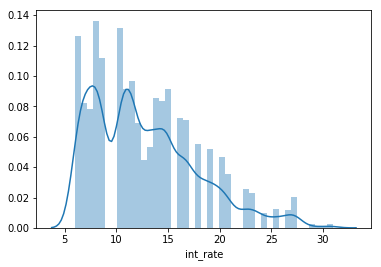

In [0]:
import seaborn as sns
sns.distplot(managers['int_rate'])

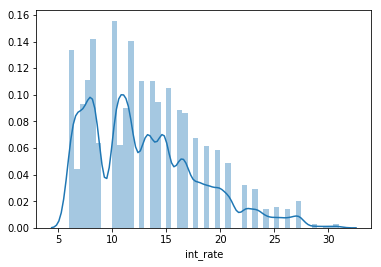

In [0]:
sns.distplot(plebians['int_rate'])

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [0]:
df['issue_d'].head().values

array(['Dec-2018', 'Dec-2018', 'Dec-2018', 'Dec-2018', 'Dec-2018'],
      dtype=object)

In [0]:
df['issue_d'].describe()

count       128412
unique           3
top       Oct-2018
freq         46305
Name: issue_d, dtype: object

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [0]:
df['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [0]:
df.dtypes

loan_amnt                                              int64
funded_amnt                                            int64
funded_amnt_inv                                      float64
term                                                  object
int_rate                                             float64
installment                                          float64
grade                                                 object
sub_grade                                             object
emp_title                                             object
emp_length                                            object
home_ownership                                        object
annual_inc                                           float64
verification_status                                   object
issue_d                                       datetime64[ns]
loan_status                                           object
pymnt_plan                                            object
purpose                 

In [0]:
df['issue_d'].describe()

count                  128412
unique                      3
top       2018-10-01 00:00:00
freq                    46305
first     2018-10-01 00:00:00
last      2018-12-01 00:00:00
Name: issue_d, dtype: object

In [0]:
df['issue_d'].dt.year.head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: issue_d, dtype: int64

In [0]:
df['issue_year'] = df['issue_d'].dt.year

In [0]:
df['issue_d'].dt.month.head()

0    12
1    12
2    12
3    12
4    12
Name: issue_d, dtype: int64

In [0]:
df.dtypes

loan_amnt                                              int64
funded_amnt                                            int64
funded_amnt_inv                                      float64
term                                                  object
int_rate                                             float64
installment                                          float64
grade                                                 object
sub_grade                                             object
emp_title                                             object
emp_length                                            object
home_ownership                                        object
annual_inc                                           float64
verification_status                                   object
issue_d                                       datetime64[ns]
loan_status                                           object
pymnt_plan                                            object
purpose                 

# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

## REPLICATE LESSON CODE

### Load new dataframe

In [0]:
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')
df = df.drop(['id','url','desc','member_id'], axis='columns')
df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment grade sub_grade             emp_title emp_length home_ownership  annual_inc verification_status   issue_d loan_status pymnt_plan             purpose                    title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  annual_inc_joint  dti_joint verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  \
0       5000         5000           5000.0   36 months   17.97%       180.69     D        D1        Administrative    6 years       MORTGAGE     59280.0     Source Verified  Dec-2018     Current          n  debt_consolidation       Debt consolidation    490xx         MI  10.51            0         Apr-2011               0                     NaN                     NaN         8        0       4599      19.1%         13                   w    4456.17        4456.17       895.96           895.96           543.83         352.13                 0.0         0.0                      0.0     Jun-2019           180.69     Jul-2019           Jun-2019                           0                          NaN            1       Individual               NaN        NaN                       NaN               0             0       110299            0            1            0            2                14.0          7150     72.0            0            2           0      35.0             24100   
1      25000        25000          25000.0   60 months   14.47%       587.82     C        C2               teacher  10+ years            OWN    110000.0        Not Verified  Dec-2018     Current          n         credit_card  Credit card refinancing    117xx         NY  26.43            1         Jan-1997               0                     7.0                     NaN        23        0      39053      45.7%         49                   w   23533.24       23533.24      2908.95          2908.95          1466.76        1442.19                 0.0         0.0                      0.0     May-2019           587.82     Jul-2019           Jun-2019                           0                          7.0            1       Individual               NaN        NaN                       NaN               0             0        95648            0            3            0            0                35.0         54716     23.0            1            2        8422      39.0             85500   
2      10000        10000          10000.0   36 months   10.33%       324.23     B        B1                   NaN   < 1 year       MORTGAGE    280000.0        Not Verified  Dec-2018     Current          n  debt_consolidation       Debt consolidation    974xx         OR   6.15            2         Jan-1996               0                    18.0                     NaN        14        0       9082        38%         23                   w    8788.59        8788.59      1612.54          1612.54          1211.41         401.13                 0.0         0.0                      0.0     May-2019           324.23     Jul-2019           Jun-2019                           0                          NaN            1       Individual               NaN        NaN                       NaN               0           671       246828            1            3            2            3                 1.0         48552     62.0            1            3        4923      46.0             23900   
3  

### Replicate the lesson code

In [0]:
def remove_percent(string):
  return float(string.strip('%'))

### Convert `int_rate`

In [0]:
df['int_rate'] = df['int_rate'].apply(remove_percent)
df.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment grade sub_grade             emp_title emp_length home_ownership  annual_inc verification_status   issue_d loan_status pymnt_plan             purpose                    title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  annual_inc_joint  dti_joint verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  \
0       5000         5000           5000.0   36 months     17.97       180.69     D        D1        Administrative    6 years       MORTGAGE     59280.0     Source Verified  Dec-2018     Current          n  debt_consolidation       Debt consolidation    490xx         MI  10.51            0         Apr-2011               0                     NaN                     NaN         8        0       4599      19.1%         13                   w    4456.17        4456.17       895.96           895.96           543.83         352.13                 0.0         0.0                      0.0     Jun-2019           180.69     Jul-2019           Jun-2019                           0                          NaN            1       Individual               NaN        NaN                       NaN               0             0       110299            0            1            0            2                14.0          7150     72.0            0            2           0      35.0             24100   
1      25000        25000          25000.0   60 months     14.47       587.82     C        C2               teacher  10+ years            OWN    110000.0        Not Verified  Dec-2018     Current          n         credit_card  Credit card refinancing    117xx         NY  26.43            1         Jan-1997               0                     7.0                     NaN        23        0      39053      45.7%         49                   w   23533.24       23533.24      2908.95          2908.95          1466.76        1442.19                 0.0         0.0                      0.0     May-2019           587.82     Jul-2019           Jun-2019                           0                          7.0            1       Individual               NaN        NaN                       NaN               0             0        95648            0            3            0            0                35.0         54716     23.0            1            2        8422      39.0             85500   
2      10000        10000          10000.0   36 months     10.33       324.23     B        B1                   NaN   < 1 year       MORTGAGE    280000.0        Not Verified  Dec-2018     Current          n  debt_consolidation       Debt consolidation    974xx         OR   6.15            2         Jan-1996               0                    18.0                     NaN        14        0       9082        38%         23                   w    8788.59        8788.59      1612.54          1612.54          1211.41         401.13                 0.0         0.0                      0.0     May-2019           324.23     Jul-2019           Jun-2019                           0                          NaN            1       Individual               NaN        NaN                       NaN               0           671       246828            1            3            2            3                 1.0         48552     62.0            1            3        4923      46.0             23900   

### Clean `emp_title`

Look at top 20 titles

In [0]:
print(df['emp_title'].value_counts(dropna=False).shape)
df['emp_title'].value_counts(dropna=False).head(20)

(43893,)


NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [0]:
df['emp_title'].isnull().sum()

20947

In [0]:
df = df.apply(lambda x: x.str.strip().str.title() if x.dtype == "object" else x)

In [0]:
def clean_title(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return "Unknown"
  return title.strip()

df['emp_title'] = df['emp_title'].apply(clean_title)
print(df['emp_title'].value_counts(dropna=False).shape)
df['emp_title'].value_counts(dropna=False).head(20)

(34902,)


Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title, dtype: int64

In [0]:
df['emp_title'].replace(['Registered Nurse', 'Rn', 'Nurse'], 'RN').value_counts(dropna=False).head(20)

Unknown                     20947
RN                           2677
Teacher                      2557
Manager                      2395
Driver                       1258
Supervisor                   1160
Truck Driver                  920
Office Manager                805
Sales                         803
General Manager               791
Project Manager               720
Owner                         625
Director                      523
Operations Manager            518
Sales Manager                 500
Police Officer                440
Technician                    420
Engineer                      412
Administrative Assistant      409
Store Manager                 398
Name: emp_title, dtype: int64

In [0]:
df['emp_title'].value_counts(dropna=False).head(20)

Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title, dtype: int64

### Create emp_title_manager

In [0]:
df['emp_title_manager'] = df['emp_title'].str.contains('Manager')
df.head()

loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  installment grade sub_grade             emp_title emp_length home_ownership  annual_inc verification_status   issue_d loan_status pymnt_plan             purpose                    title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  annual_inc_joint  dti_joint verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  \
0       5000         5000           5000.0  36 Months     17.97       180.69     D        D1        Administrative    6 Years       Mortgage     59280.0     Source Verified  Dec-2018     Current          N  Debt_Consolidation       Debt Consolidation    490Xx         Mi  10.51            0         Apr-2011               0                     NaN                     NaN         8        0       4599      19.1%         13                   W    4456.17        4456.17       895.96           895.96           543.83         352.13                 0.0         0.0                      0.0     Jun-2019           180.69     Jul-2019           Jun-2019                           0                          NaN            1       Individual               NaN        NaN                       NaN               0             0       110299            0            1            0            2                14.0          7150     72.0            0            2           0      35.0             24100   
1      25000        25000          25000.0  60 Months     14.47       587.82     C        C2               Teacher  10+ Years            Own    110000.0        Not Verified  Dec-2018     Current          N         Credit_Card  Credit Card Refinancing    117Xx         Ny  26.43            1         Jan-1997               0                     7.0                     NaN        23        0      39053      45.7%         49                   W   23533.24       23533.24      2908.95          2908.95          1466.76        1442.19                 0.0         0.0                      0.0     May-2019           587.82     Jul-2019           Jun-2019                           0                          7.0            1       Individual               NaN        NaN                       NaN               0             0        95648            0            3            0            0                35.0         54716     23.0            1            2        8422      39.0             85500   
2      10000        10000          10000.0  36 Months     10.33       324.23     B        B1               Unknown   < 1 Year       Mortgage    280000.0        Not Verified  Dec-2018     Current          N  Debt_Consolidation       Debt Consolidation    974Xx         Or   6.15            2         Jan-1996               0                    18.0                     NaN        14        0       9082        38%         23                   W    8788.59        8788.59      1612.54          1612.54          1211.41         401.13                 0.0         0.0                      0.0     May-2019           324.23     Jul-2019           Jun-2019                           0                          NaN            1       Individual               NaN        NaN                       NaN               0           671       246828            1            3            2            3                 1.0         48552     62.0            1            3        4923      46.0             23900   
3  

### Convert `term` column from string to integer

In [0]:
df['term'].value_counts()

36 Months    88179
60 Months    40233
Name: term, dtype: int64

In [0]:
df['term'] = df['term'].str.rstrip('Months').astype('int')

In [0]:
df['term'].value_counts()

36    88179
60    40233
Name: term, dtype: int64

 ### Add `loan_status_is_great` column

In [0]:
df['loan_status'].value_counts()

Current               114514
Fully Paid              9785
Late (31-120 Days)      1878
Charged Off             1028
In Grace Period          807
Late (16-30 Days)        397
Default                    3
Name: loan_status, dtype: int64

In [0]:
def is_loan_status_great(string):
    string = string.strip()
    if string == 'Current' or string == 'Fully Paid':
        return 1
    else:
        return 0

df['is_loan_status_great'] = df['loan_status'].str.strip().apply(is_loan_status_great)

In [0]:
df['is_loan_status_great'].dtype

dtype('int64')

In [0]:
# Alternatively you can also use
df['loan_status'].str.strip().apply(lambda x: 1 if x == 'Current' or x == 'Fully Paid' else 0).value_counts()

1    124299
0      4113
Name: loan_status, dtype: int64

In [0]:
df.shape

(128412, 142)

### Make last_pymnt_d_month and last_pymnt_d_year columns

In [0]:
df.iloc[1708:1710]

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade sub_grade         emp_title emp_length home_ownership  annual_inc verification_status   issue_d  loan_status pymnt_plan             purpose                    title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  annual_inc_joint  dti_joint verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  \
1708      10000        10000          10000.0    36      7.02       308.87     A        A2        Dishwasher    2 Years           Rent     18000.0            Verified  Dec-2018      Current          N         Credit_Card  Credit Card Refinancing    850Xx         Az  19.07            0         Jun-2014               0                     NaN                     NaN         6        0       9823      28.1%          6                   W    4052.99        4052.99      6124.46          6124.46          5947.01         177.45                 0.0         0.0                      0.0     May-2019           308.87     Jul-2019           Jun-2019                           0                          NaN            1        Joint App          143000.0       3.94                       NaN               0             0         9823            1            0            0            0                 NaN             0      NaN            3            3        7182      28.0             35000   
1709      20975        20975          20975.0    36      8.19       659.13     A        A4  Project Director    2 Years       Mortgage    165000.0            Verified  Dec-2018  Charged Off          N  Debt_Consolidation       Debt Consolidation    194Xx         Pa  24.27            0         Oct-1997               0                     NaN                     NaN         9        0       4210      16.6%         21                   W       0.00           0.00         0.00             0.00             0.00           0.00                 0.0         0.0                      0.0          NaN             0.00          NaN           Jun-2019                           0                          NaN            1       Individual               NaN        NaN                       NaN               0             0       319246            0            2            1            2                11.0         67142      NaN            0            2        3004      17.0             25300   

      inq_fi  total_cu_tl  inq_last_12m  acc_open_past_24mths  avg_cur_bal  bc_open_to_buy  bc_util  chargeoff_within_12_mths  delinq_amnt  mo_sin_old_il_acct  mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  mths_since_recent_bc  mths_since_recent_bc_dlq  mths_since_recent_inq  mths_since_recent_revol_delinq  num_accts_ever_120_pd  num_actv_bc_tl  num_actv_rev_tl  num_bc_sats  num_bc_tl  num_il_tl  num_op_rev_tl  num_rev_accts  num_rev_tl_bal_gt_0  num_sats  num_tl_120dpd_2m  num_tl_30dpd  num_tl_90g_dpd_24m  num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  total_il_high_credit_limit  revol_bal_joint sec_app_earliest_cr_line  sec_app_inq_last_6mths  sec_app_mort_acc  sec_app_open_acc  sec_app_revol_util  sec_app_open_act_il  sec_app_num_rev_accts  sec_app_chargeoff_within_12_mths  sec_app_collections_12_mths_ex_med  sec_app_mths_since_last_major_derog hardship_flag  \
1708       0            0 

In [0]:
df['last_pymnt_d'].value_counts(dropna=False)

Jun-2019    103574
May-2019     14806
Apr-2019      2408
Mar-2019      2002
Feb-2019      1925
Jan-2019      1560
Dec-2018      1054
Nov-2018       679
Oct-2018       234
NaN            159
Jul-2019        11
Name: last_pymnt_d, dtype: int64

In [0]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], infer_datetime_format=True)

In [0]:
df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.month
df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year

In [0]:
df['last_pymnt_d_month'].value_counts(dropna=False)

6.0     103574
5.0      14806
4.0       2408
3.0       2002
2.0       1925
1.0       1560
12.0      1054
11.0       679
10.0       234
NaN        159
7.0         11
Name: last_pymnt_d_month, dtype: int64

In [0]:
df['last_pymnt_d_year'].value_counts(dropna=False)

2019.0    126286
2018.0      1967
NaN          159
Name: last_pymnt_d_year, dtype: int64

In [0]:
df['last_pymnt_d'].describe()

count                  128253
unique                     10
top       2019-06-01 00:00:00
freq                   103574
first     2018-10-01 00:00:00
last      2019-07-01 00:00:00
Name: last_pymnt_d, dtype: object

In [0]:
df[df['last_pymnt_d'].isnull()]['loan_status'].value_counts(dropna=False)

Charged Off    159
Name: loan_status, dtype: int64

In [0]:
df['last_pymnt_d'].tail()

128407   2018-12-01
128408   2019-06-01
128409   2019-06-01
128410   2019-06-01
128411   2019-06-01
Name: last_pymnt_d, dtype: datetime64[ns]

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!



### Convert `revol_util` from string to float

In [0]:
df2 = df.copy()
df2.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade sub_grade             emp_title emp_length home_ownership  annual_inc verification_status   issue_d loan_status pymnt_plan             purpose                    title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  annual_inc_joint  dti_joint verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  \
0       5000         5000           5000.0    36     17.97       180.69     D        D1        Administrative    6 Years       Mortgage     59280.0     Source Verified  Dec-2018     Current          N  Debt_Consolidation       Debt Consolidation    490Xx         Mi  10.51            0         Apr-2011               0                     NaN                     NaN         8        0       4599      19.1%         13                   W    4456.17        4456.17       895.96           895.96           543.83         352.13                 0.0         0.0                      0.0   2019-06-01           180.69     Jul-2019           Jun-2019                           0                          NaN            1       Individual               NaN        NaN                       NaN               0             0       110299            0            1            0            2                14.0          7150     72.0            0            2           0      35.0             24100   
1      25000        25000          25000.0    60     14.47       587.82     C        C2               Teacher  10+ Years            Own    110000.0        Not Verified  Dec-2018     Current          N         Credit_Card  Credit Card Refinancing    117Xx         Ny  26.43            1         Jan-1997               0                     7.0                     NaN        23        0      39053      45.7%         49                   W   23533.24       23533.24      2908.95          2908.95          1466.76        1442.19                 0.0         0.0                      0.0   2019-05-01           587.82     Jul-2019           Jun-2019                           0                          7.0            1       Individual               NaN        NaN                       NaN               0             0        95648            0            3            0            0                35.0         54716     23.0            1            2        8422      39.0             85500   
2      10000        10000          10000.0    36     10.33       324.23     B        B1               Unknown   < 1 Year       Mortgage    280000.0        Not Verified  Dec-2018     Current          N  Debt_Consolidation       Debt Consolidation    974Xx         Or   6.15            2         Jan-1996               0                    18.0                     NaN        14        0       9082        38%         23                   W    8788.59        8788.59      1612.54          1612.54          1211.41         401.13                 0.0         0.0                      0.0   2019-05-01           324.23     Jul-2019           Jun-2019                           0                          NaN            1       Individual               NaN        NaN                       NaN               0           671       246828            1            3            2            3                 1.0         48552     62.0            1            3        4923      46.0             23900   
3       4000         40

In [0]:
df2["revol_util"].dtype

dtype('O')

In [0]:
df2["revol_util"].value_counts(dropna=False).sort_values(ascending=False).head(20)

0%       1132
43%       225
49%       222
39.1%     220
32%       217
32.9%     216
28%       214
37.5%     213
44%       212
33.8%     211
51%       211
33%       211
34%       210
29%       210
38%       210
47%       208
33.3%     208
39%       205
37.3%     203
45%       203
Name: revol_util, dtype: int64

In [0]:
df2["revol_util"].isnull().sum()

156

In [0]:
df2["revol_util"] = df2["revol_util"].str.rstrip('%').astype('float')

In [0]:
df2['revol_util'].head()

0    19.1
1    45.7
2    38.0
3    19.2
4    63.1
Name: revol_util, dtype: float64

In [0]:
df2["revol_util"].isnull().sum()

156

### Modify the emp_title column to replace titles with 'Other' if the title is not in the top 20

In [0]:
df3 = df2.copy()

In [0]:
top_jobs = df3['emp_title'].value_counts().head(20).index.tolist()
top_jobs

['Unknown',
 'Teacher',
 'Manager',
 'Registered Nurse',
 'Driver',
 'Supervisor',
 'Truck Driver',
 'Rn',
 'Office Manager',
 'Sales',
 'General Manager',
 'Project Manager',
 'Owner',
 'Director',
 'Operations Manager',
 'Sales Manager',
 'Police Officer',
 'Nurse',
 'Technician',
 'Engineer']

In [0]:
df3['emp_title'].value_counts().sort_values(ascending=False).head(20)

Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title, dtype: int64

In [0]:
df.shape

(128412, 144)

In [0]:
 df3['emp_title'].str.strip().apply(lambda x: x if x in top_jobs else 'Other').value_counts().head(20)

Other                 89941
Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Name: emp_title, dtype: int64

In [0]:
def replace_others(x):
    if x in top_jobs:
        return x
    else:
        return 'Other'
df3['emp_title'].str.strip().apply(replace_others).value_counts().head(20)

Other                 89941
Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Name: emp_title, dtype: int64

In [0]:
df3['emp_title'].value_counts().head(20)

Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title, dtype: int64

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-07-12 00:22:51--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.104.229
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.104.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’

instacart_online_gr 100%[===================>] 196.03M  47.0MB/s    in 4.5s    

2019-07-12 00:22:56 (43.2 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01
